## Análise de Rotatividade

In [58]:
# Faremos uma investigação, no qual tentaremos evidenciar os principais motivos da rotatividade dentro de uma empresa
#um trabalho de people analytics com foco na KPI rotatividade

In [1]:
# importação das bibliotecas usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importação da Base de dados

df = pd.read_csv('C:/RH/HR_comma_sep.csv')

In [168]:
# primiera vizualização dos dados
df.rename(columns={'sales': 'department'}, inplace = True)
df



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.describe()

# na função describe pode-se vizualizar uma primeira camada de análises, destacam-se:
# média de rotatividade ( coluna left) taxa na média de 23%
# média de 61% na taxa de satisfação.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [23]:
df['salary'] = df['salary'].map({'low':1, 'medium':2, 'high':3})

# Mudando a coluna salário de palavras ( low, medium, high), para numeros
# 1 = baixo salário , 2 = médio salário , 3 = alto salário

In [33]:
print(df['left'].value_counts()[1],'Pessoas que sairam da empresa')

# Quanditade das pessoas que sairam da empresa

3571 Pessoas que sairam da empresa


### Trabalhando com  hipóteses 

### Nivel de satisfação

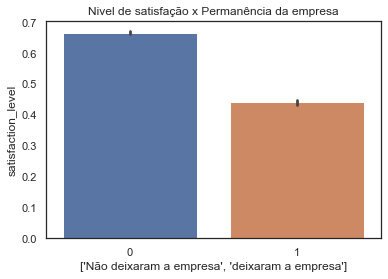

In [69]:
labels_left = ['Não deixaram a empresa', 'Deixaram a empresa']
sns.barplot(x='left', y ='satisfaction_level' ,data=df).set_title('Nivel de satisfação x Permanência da empresa')
plt.xlabel(['Não deixaram a empresa','deixaram a empresa'])
plt.show()


In [110]:
# Como esperado o nivel de satisfação dos funcionários é um fato relevante
# os mais satisfeitos tedem a não sair, porém ainda é um dado muito genérico, vamos explorar mais esse dado.

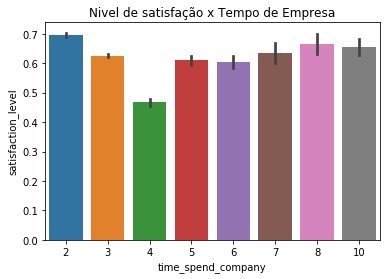

In [4]:
sns.barplot(x='time_spend_company',y='satisfaction_level',data=df).set_title('Nivel de satisfação x Tempo de Empresa')
plt.show()

In [111]:
# Acima temos um nivel de satisfação por tempo de empresa, note que a maior taxa de satisfação está,
# na faixa nos novos funcionários, após isso a taxa diminui e dos 5 anos para estabiliza
# podemos, então , presumir que faixa de empregados que deixam a empresa pode estar nessa faixa de 3 -4 anos de empresa.
# Vamos tentar entender o que pode estar acontecendo nessa faixa apresentada

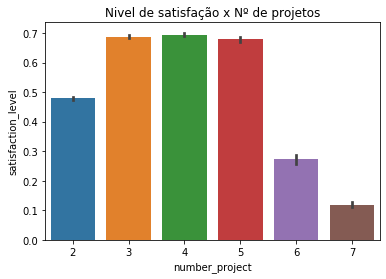

In [13]:
sns.barplot(x='number_project',y='satisfaction_level',data=df).set_title('Nivel de satisfação x Nº de projetos')
plt.show()

In [141]:
# Gráfico acima mostra quando uma pessoa executa de 3 a 5 projetos , o nivel de satisfação tende a subir.

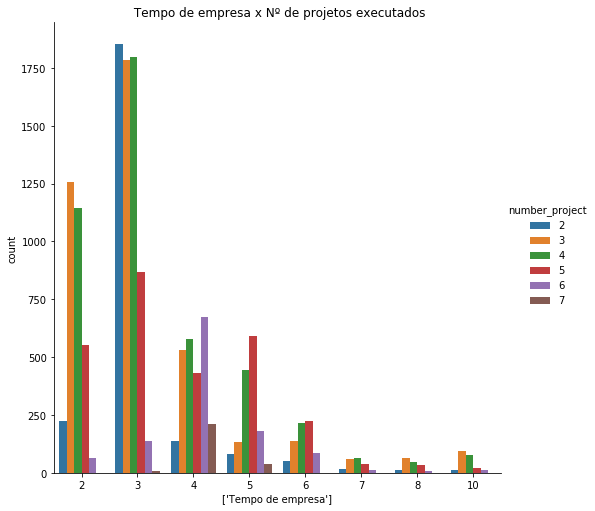

In [59]:
sns.catplot( x='time_spend_company', hue = 'number_project', kind='count' ,data=df , height = 7,)
plt.title(' Tempo de empresa x Nº de projetos executados')
plt.xlabel(['Tempo de empresa'])
plt.show()

In [130]:
# Nesse gráfico vemos que os funcionários na faixa de 4 anos de empresa tiveram mais ocorrências de
# em ,certas vezes, trabalharem em 6 ou mais projetos, e como vimos acima quanto mais projetos menos satisfação.

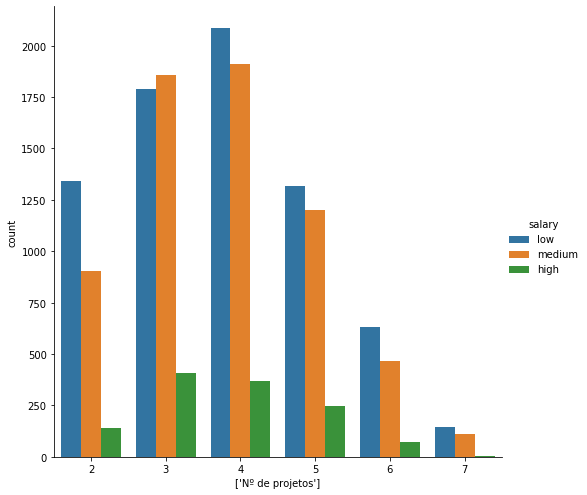

In [61]:
sns.catplot( x='number_project', hue = 'salary', kind='count' ,data=df , height = 7)
plt.xlabel(['Nº de projetos'])
plt.show()

In [137]:
# Acima uma representação entre o número de projeto e sálario. 
# Não necessariamente trablhar em mais projetos significa ter um salário maior, na realidade 
# isso mostra- se até o contratio, onde existe 6-7 projetos os salários são menores

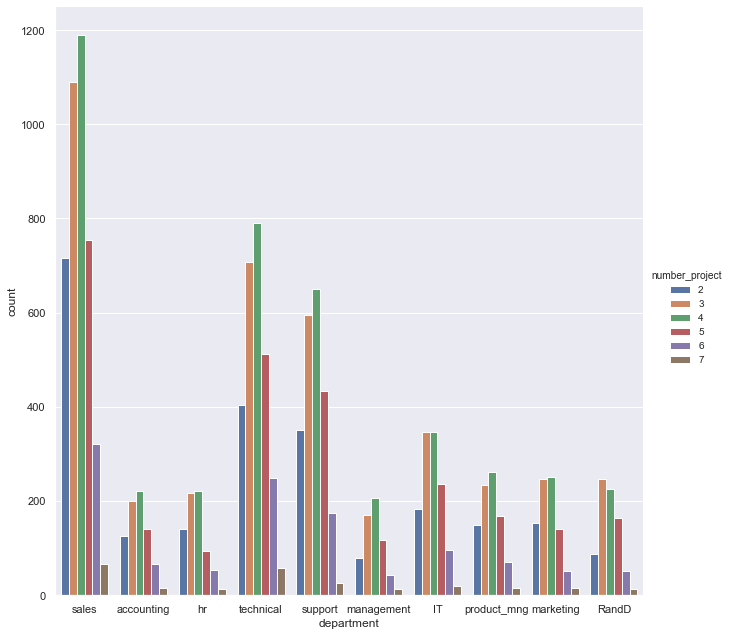

In [184]:
#sns.barplot(x='number_project', y ='department' ,data=df)
plt.rcParams['legend.fontsize'] = 10
sns.catplot( x='department', hue = 'number_project', kind='count' ,data=df , height = 9)
plt.show()

In [ ]:
# Aqui podemos verificar que a área de vendas, área técnica e a área de suporte , são onde ocorrem os maoires 
# registros de projetos acima de 5.



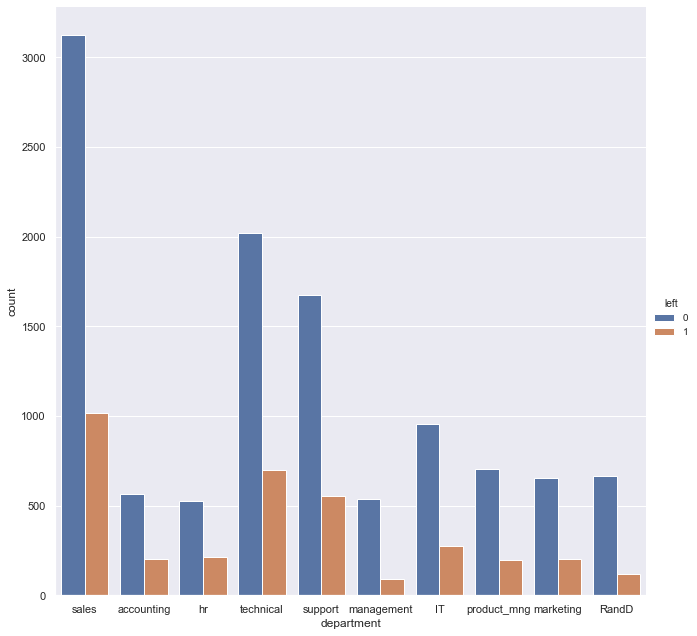

In [185]:
plt.rcParams['legend.fontsize'] = 10
sns.catplot( x='department', hue = 'left', kind='count' ,data=df , height = 9)
plt.show()

In [ ]:
# E aqui verificamos que nas áreas com mais projetos envolvidos é onde ocorre o maior numero de saídas


### Conclusão da hipótese estudada : Existe uma problema na distribuição de quantidades de projetos, onde as pessoas que estão na faixa de 4 anos de empresa tendem a trabalhar mais e com isso vemos uma queda na satisfação dos funcionários, o que pode levar a saída do profissional da empresa. Para esse mesmo problema, observamos que é área de vendas , suporte e técnica é onde existem ocorrencias de uma possível má distribuição dos projetos.

## Crescimento profissional

#### Aqui vamos analisar como o crescimento profissional pode afetar a rotatividade

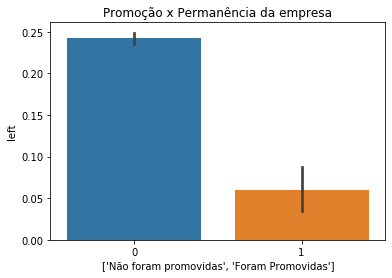

In [62]:
sns.barplot(x='promotion_last_5years', y ='left' ,data=df).set_title('Promoção x Permanência da empresa')
plt.xlabel(['Não foram promovidas','Foram Promovidas'])
plt.show()

In [159]:
print(df.promotion_last_5years.sum())
print(df.promotion_last_5years.mean())

319
0.021268084538969265


In [ ]:
# Acima vemos que as não promoções acentuam a saída da empresa
# tivemos um total de 319 pessoas promovidas que representa média de 2% nas promoções,
# a difuculdade de uma promoção pode desestimular as pessoas a ficarem.

In [46]:
df.tail()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


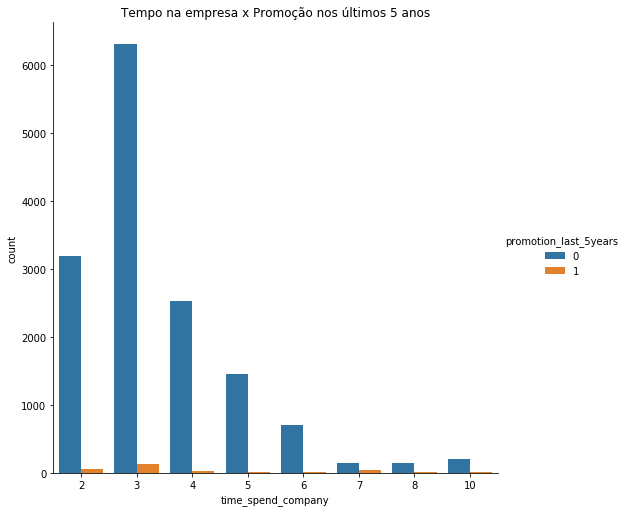

In [44]:
sns.catplot( x='time_spend_company', hue = 'promotion_last_5years', kind='count' ,data=df , height = 7)
plt.title('Tempo na empresa x Promoção nos últimos 5 anos')
plt.show()

In [47]:
# Vemos que  existe pouca acenção profissinal dos 4 a 6 anos de empresa, funcionários nessa faixa 
# podem se sentir estagnados e procurar outrar oportunidades. 

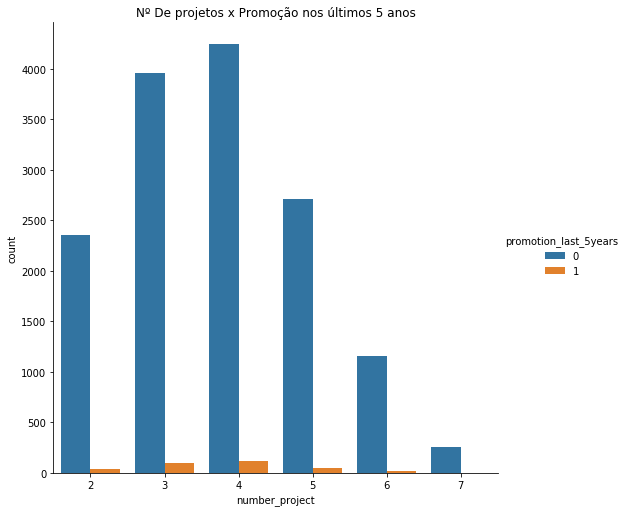

In [50]:
sns.catplot( x='number_project', hue = 'promotion_last_5years', kind='count' ,data=df , height = 7)
plt.title( 'Nº De projetos x Promoção nos últimos 5 anos')
plt.show()

In [49]:
# Trabalhar em um grande número de projetos não causa uma maior expectativa de promoções. 
# vemos que acontece até o contrário. existe uma maior taxa de promoção quando o numero de projetos
# fica dentro da taxa de satisfação.

### Conclusão:  
#### Nesse primeiro estudo indentificamos que os funcionários ,que tendem a deixa a empresa, estão na faixa dos funcionários,  que possuem entre 3 e 4 anos '' de casa'', e dentro dessa faixa se destacam:
#### Uma maior incidencia de demissões voluntárias devido ao alto numero de projeto que essas pessoas trabalham
#### Trabalhar em mais projetos não indica um aumento salarial.
#### Trabalhar em mais projetos não indica que haverá uma promoção.
#### Uma ocorrência maior  de demissões dentro das áreas de Vendas, Suporte e área técnica.
#### Dentro da faixa estudada, esses funcionários foram os que menos tiveram pormoções, porém mais projetos 
#### Tempo de empresa não indica um aumento de promoção.

## Ações:
#### É necessário revisar como os projetos estão sendo distribuidos, verificar por que as áreas afetas recebem mais projetos.
#### Rever o plano de carreira da empresa, verifcar os metodos utilizados para pomoções e aumentos de salário. 


## Vitor José Lima de Oliveira